In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

# Library for feature Scaling
from sklearn.preprocessing import RobustScaler

#Libraries for logistic Regression Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


#Library for evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [117]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [118]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [119]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [120]:
train_data.shape

(891, 12)

In [121]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [122]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [123]:
train_data_num_col = train_data.select_dtypes(exclude=['object']).columns
train_data_num = train_data[train_data_num_col]

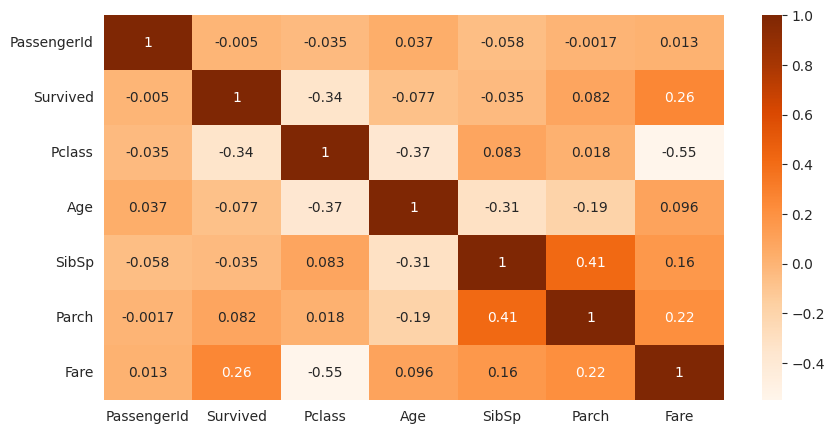

In [124]:
plt.figure(figsize=(10, 5))
sns.heatmap(train_data_num.corr(), annot=True, cmap='Oranges');

In [125]:
correlation = abs(pd.DataFrame(train_data_num.corr().Survived))
correlation

,Survived
PassengerId,0.005007
Survived,1.000000
Pclass,0.338481
Age,0.077221
SibSp,0.035322
Parch,0.081629
Fare,0.257307


In [126]:
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [127]:
train_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [128]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<ipython-input-129-cc9a46982b39>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




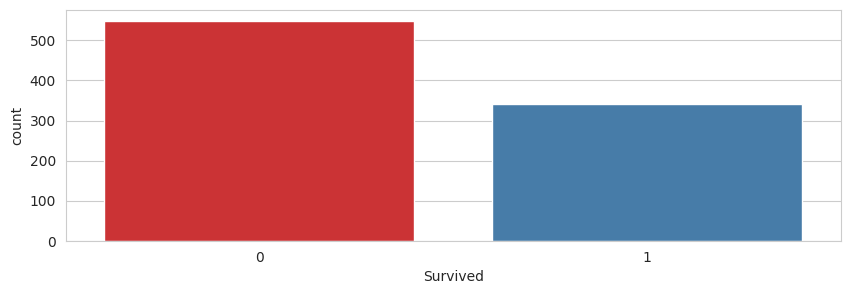

In [129]:
plt.figure(figsize=(10, 3))
sns.countplot(x = "Survived",data=train_data, palette="Set1")
plt.show()

<ipython-input-130-6dcd6b207d15>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Figure size 1000x300 with 0 Axes>

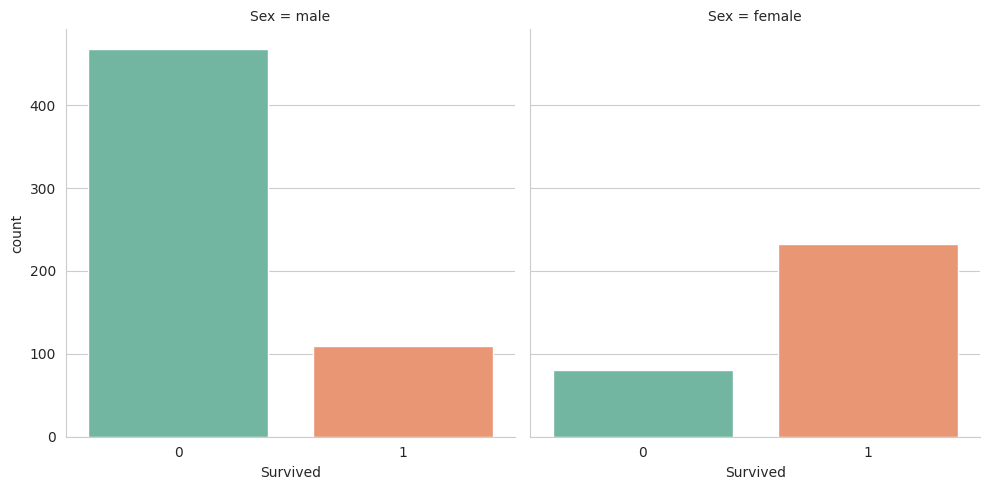

In [130]:
plt.figure(figsize=(10, 3))
sns.catplot(x='Survived', col='Sex', kind='count', data=train_data,palette="Set2");
plt.show()

<ipython-input-131-87f4924ea522>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Figure size 1000x300 with 0 Axes>

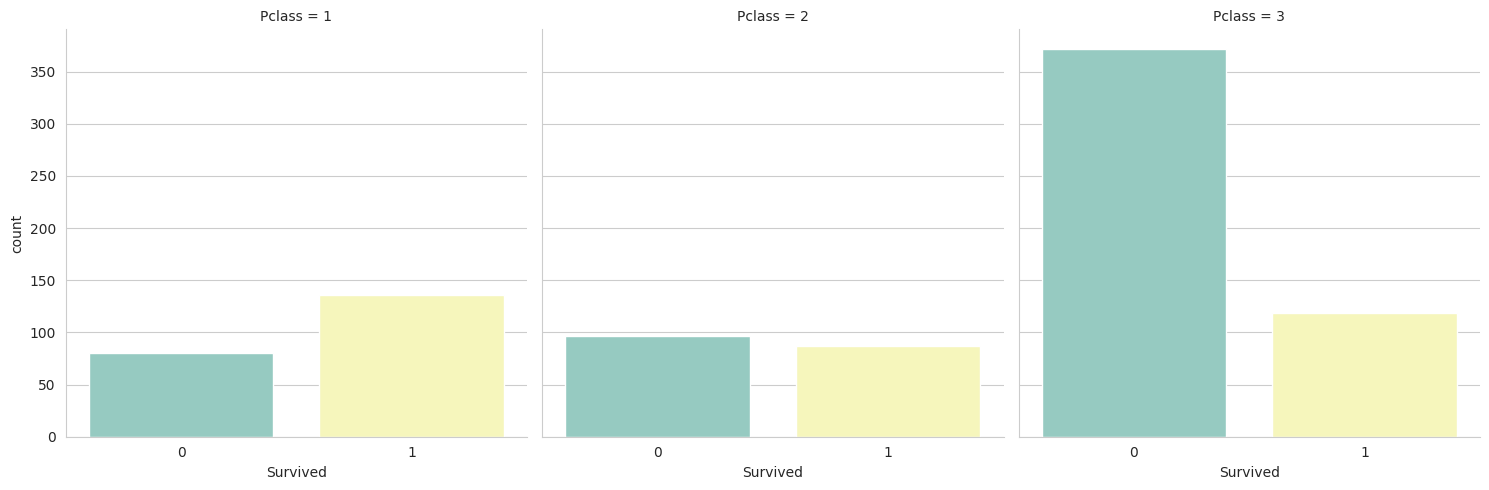

In [131]:
plt.figure(figsize=(10, 3))
sns.catplot(x='Survived', col='Pclass', kind='count', data=train_data,palette="Set3");
plt.show()

<Figure size 1000x300 with 0 Axes>

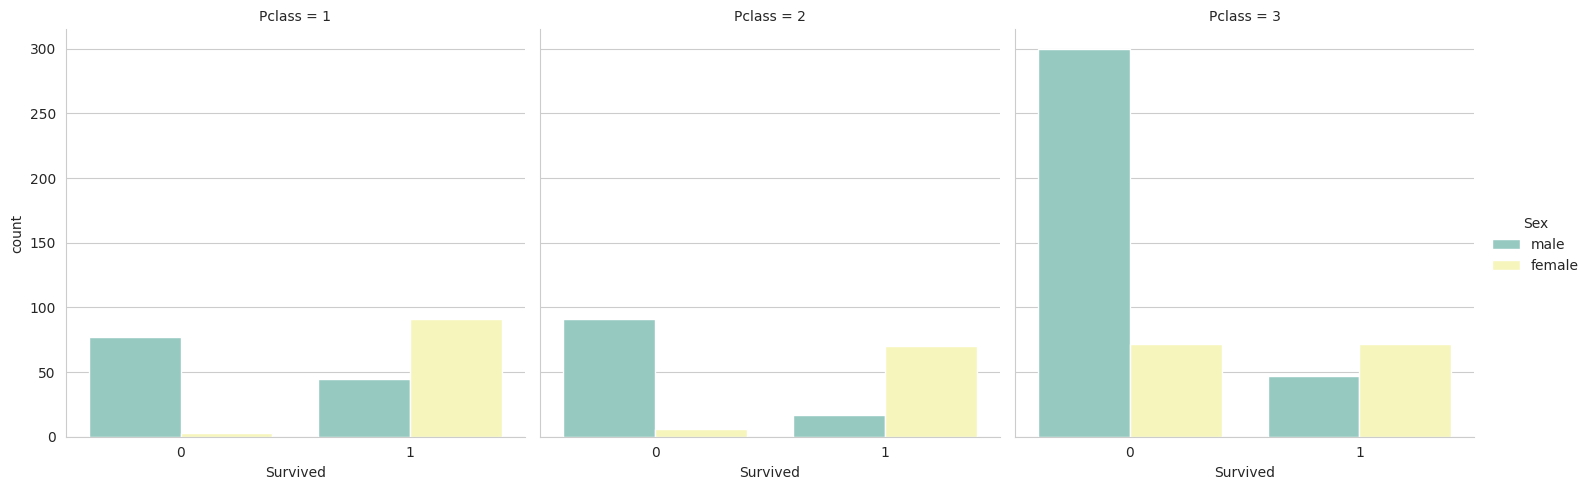

In [132]:
plt.figure(figsize=(10, 3))
sns.set_style('whitegrid')
sns.catplot(x='Survived', col='Pclass', hue = 'Sex', kind='count', data=train_data,palette="Set3");
plt.show()

In [133]:
pd.crosstab(train_data.Sex,train_data.Survived,normalize = "index" ).style.background_gradient(cmap='crest')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [134]:
pd.crosstab(train_data.Pclass,train_data.Survived,normalize = "index" ).style.background_gradient(cmap='Spectral_r')

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


In [135]:
train_data["Age"].fillna(train_data["Age"].median(skipna=True), inplace=True)
train_data["Pclass"].fillna(train_data["Pclass"].median(skipna=True), inplace=True)
train_data.drop('Cabin',axis=1,inplace=True)

In [136]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [137]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [138]:
train_data.dropna(inplace=True)

In [139]:
train_data.drop(['Name','Ticket'],axis=1,inplace=True)

In [140]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [141]:
train_data = pd.get_dummies(train_data, columns = ['Sex'], drop_first=True)
train_data = pd.get_dummies(train_data, columns = ['Embarked'], drop_first=True)

In [142]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [143]:
train_data.drop('PassengerId',axis=1,inplace=True)

In [144]:
X = train_data.drop(['Survived'],axis = 1)
y = train_data['Survived']

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101)

In [146]:
cols = X_train.columns

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train,columns=cols)
X_test = pd.DataFrame(X_test,columns=cols)

In [147]:
LogisticRegression_model = LogisticRegression(max_iter=4000)
LogisticRegression_model.fit(X_train,y_train)

LogisticRegression(max_iter=4000)

In [148]:
y_pred = LogisticRegression_model.predict(X_test)

In [149]:
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[98,  9],
       [24, 47]])

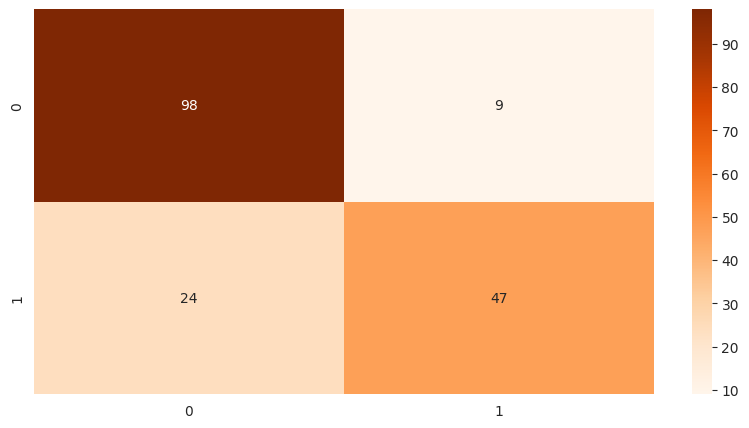

In [150]:
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Oranges')
plt.show()

In [151]:
print('Accuracy of Logistic Regression model is  : ', (metrics.accuracy_score(y_test, y_pred)))
print('Recall of Logistic Regression model is    : ', (metrics.recall_score(y_test, y_pred)))
print('Precision of Logistic Regression model is : ', (metrics.precision_score(y_test, y_pred)))

Accuracy of Logistic Regression model is  :  0.8146067415730337
Recall of Logistic Regression model is    :  0.6619718309859155
Precision of Logistic Regression model is :  0.8392857142857143
